<a href="https://colab.research.google.com/github/masterNLPIA2223/aprendizaje-automatico-sesion-2-RocioUrquijo/blob/main/explicacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word embeddings

En este notebook veremos distintos word embeddings. Para ello usaremos una librería de procesamiento de lenguaje natural llamada [gensim](https://radimrehurek.com/gensim/index.html).

## Modelo antiguo

Antes de hablar de los modelos modernos, conviene conocer los modelos antiguos y sus limitaciones.

Una de las técnicas más utilizadas hasta hace poco para codificar frases era conocida como [bolsa de palabras (o *bag of words*)](https://en.wikipedia.org/wiki/Bag-of-words_model). Esta técnica transforma cada documento a un vector de enteros de longitud fija.

Por ejemplo, para las siguientes dos frases:

1. A Juan le gusta ver películas. A María también le gusta.
2. A Juan le gusta ver partidos de fútbol. María odia el futbol.

El modelo produce los siguientes vectores (cada fila de la siguiente tabla representa una de las frases).


| Palabras | A | Juan | le | gusta | ver | películas | María | también | partidos | fútbol | odia | el |
|---------|--------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- |
|Frase 1|2 | 1 | 2 | 1 | 1 | 1 | 1 |1 | 0 | 0 | 0 | 0 |
|Frase 2|1 | 1 | 1 | 1 | 1 | 0 | 1 |0 | 1 | 1 | 1 | 1 |

Cada vector tiene 12 elementos, donde cada elemento cuenta el número de veces que una determinada palabra ocurre en dicho documento.

Este modelo era muy efectivo, pero tenía varias limitaciones. En primer lugar se pierde información sobre el orden de las palabras. Por ejemplo, las frases "A María le gusta Juan" y "A Juan le gusta María" tienen vectores idénticos. La solución consiste en usar [n-gramas](https://en.wikipedia.org/wiki/N-gram). Además este modelo tiene la limitación de ser *sparse* (muchos ceros para cada vector) y tener una dimensionalidad muy alta.

Otro de los problemas más importantes es que este modelo no aprende el significado de las palabras subyacentes, y como consecuencia la distancia entre vectores no refleja la similitud o diferencia en significado. Estos problemas se han resuelto con los word-embeddings.





## Word2Vec

El modelo [Word2Vec](https://arxiv.org/pdf/1301.3781.pdf) fue introducido en 2013 por investigadores de Google, y es capaz de incrustar las palabras en un vector de dimensión bja usando una red neuronal. El resultado es un modelo donde los vectores que están cerca en el espacio tienen significados similares basados en el contexto. Es decir, no existe un único modelo word2vec, sino que es un modelo que se entrena a partir de un dataset (dicho dataset puede ser la wikipedia, twitter, ...).

Vamos a ver que es posible hacer con uno de estos modelos. Para ello vamos a usar un modelo entrenado en el dataset de noticias de Google. Por el momento vamos a usar modelos entrenados en inglés, más adelante en la práctica veremos cómo usar modelos en español.

Comenzamos descargando el modelo (esto puede costar un tiempo).

In [1]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


Una tarea común es obtener las primeras palabras del vocabulario usado para construir el modelo.

In [4]:
for i, word in enumerate(wv.index_to_key):
    if i == 10:
        break
    print(word)


</s>
in
for
that
is
on
##
The
with
said


Ahora podemos ver cuál es la representación de una palabra.

In [5]:
wv['king']

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [6]:
wv['queen']

array([ 0.00524902, -0.14355469, -0.06933594,  0.12353516,  0.13183594,
       -0.08886719, -0.07128906, -0.21679688, -0.19726562,  0.05566406,
       -0.07568359, -0.38085938,  0.10400391, -0.00081635,  0.1328125 ,
        0.11279297,  0.07275391, -0.046875  ,  0.06591797,  0.09423828,
        0.19042969,  0.13671875, -0.23632812, -0.11865234,  0.06542969,
       -0.05322266, -0.30859375,  0.09179688,  0.18847656, -0.16699219,
       -0.15625   , -0.13085938, -0.08251953,  0.21289062, -0.35546875,
       -0.13183594,  0.09619141,  0.26367188, -0.09472656,  0.18359375,
        0.10693359, -0.41601562,  0.26953125, -0.02770996,  0.17578125,
       -0.11279297, -0.00411987,  0.14550781,  0.15625   ,  0.26757812,
       -0.01794434,  0.09863281,  0.05297852, -0.03125   , -0.16308594,
       -0.05810547, -0.34375   , -0.17285156,  0.11425781, -0.09033203,
        0.13476562,  0.27929688, -0.04980469,  0.12988281,  0.17578125,
       -0.22167969, -0.01190186,  0.140625  , -0.18164062,  0.11

Desafortunadamente el modelo no es capaz de inferir el vector asociado a palabras "raras".

In [7]:
try:
    vec_cameroon = wv['cameroon']
except KeyError:
    print("The word 'cameroon' does not appear in this model")

The word 'cameroon' does not appear in this model


Estos modelos proporcionan distintas funciones para tratar varios problemas.

Por ejemplo, podemos ver la similitud entre palabras.


In [8]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'car'	'minivan'	0.69
'car'	'bicycle'	0.54
'car'	'airplane'	0.42
'car'	'cereal'	0.14
'car'	'communism'	0.06


Podemos también mostrar las 5 palabras más similares a *car*.

In [9]:
print(wv.most_similar(positive=['car'], topn=5))

[('vehicle', 0.7821096181869507), ('cars', 0.7423831224441528), ('SUV', 0.7160962224006653), ('minivan', 0.6907036900520325), ('truck', 0.6735789775848389)]


**Ejercicio**: Busca las 5 palabras más similares para Spain.

In [10]:
print(wv.most_similar(positive=['Spain'], topn=5))

[('Portugal', 0.7220357060432434), ('Inveravante_Inversiones_SL', 0.6925068497657776), ('Spains', 0.6856308579444885), ('Madrid', 0.6743447184562683), ('Spaniards', 0.6629220247268677)]


Es posible también buscar analogías. Por ejemplo, para resolver la analogía *man is to king, as woman is to ...*, se debe ejecutar la siguiente instrucción.

In [11]:
wv.most_similar_cosmul(positive=['king','woman'],negative=['man'])

[('queen', 0.9314123392105103),
 ('monarch', 0.858533501625061),
 ('princess', 0.8476566076278687),
 ('Queen_Consort', 0.8150269985198975),
 ('queens', 0.8099815249443054),
 ('crown_prince', 0.8089976906776428),
 ('royal_palace', 0.8027306795120239),
 ('monarchy', 0.8019613027572632),
 ('prince', 0.800979733467102),
 ('empress', 0.7958389520645142)]

**Ejercicio**: Da respuesta a las siguientes analogías.

*Eat is to ate, as go is to ...*

In [12]:
wv.most_similar_cosmul(positive=['go','ate'],negative=['eat'])

[('went', 0.9165000319480896),
 ('gone', 0.8448726534843445),
 ('came', 0.816146969795227),
 ('ran', 0.8127627372741699),
 ('stayed', 0.7917162179946899),
 ('goes', 0.779657244682312),
 ('sneaked', 0.774756669998169),
 ('snuck', 0.768629252910614),
 ('got', 0.7652180790901184),
 ('walked', 0.7639439702033997)]

*Madrid is to Spain, as Berlin is to ...*

In [13]:
wv.most_similar_cosmul(positive=['Berlin','Spain'],negative=['Madrid'])

[('Germany', 0.9708643555641174),
 ('Austria', 0.8568971753120422),
 ('German', 0.8524767756462097),
 ('Hungary', 0.8441289663314819),
 ('Poland', 0.8382856845855713),
 ('Annita_Kirsten', 0.8365224599838257),
 ('Thielert_AG_Hamburg', 0.8243475556373596),
 ('Buffalo_Sabres_Jochen_Hecht', 0.8205474615097046),
 ('symbol_RSTI', 0.8203197121620178),
 ('Saxony', 0.8148468732833862)]

También es posible encontrar palabras extrañas dentro de un grupo de palabras.

Por ejemplo, ¿cuál de las siguientes palabras no encaja en la lista ``[Jupyter, Earth, Saturday, Mars, Moon]``?

In [14]:
wv.doesnt_match(['Jupyter','Earth','Saturday','Mars','Moon'])

'Saturday'

**Ejercicio** ¿Qué palabra no encaja en la siguiente lista ``[April, May, September, Monday, July]``?

In [15]:
wv.doesnt_match(['April','May','September','Monday','July'])

'Monday'

## Glove y Fasttext

Además de word2vec, han aparecido otros embeddings. Los más conocidos son [Glove](https://nlp.stanford.edu/projects/glove/) y [FastText](https://fasttext.cc/).

Como hemos explicado anteriormente, el método word2vec aprende la representación de las palabras mediante una red neuronal. En cambio estos otros dos embeddings funcionan de manera un poco distinta.

Glove se basa en técnicas de factorización de matrices. Para ello comienza construyendo una gran matriz con tantas filas y columnas como palabras. En esta matriz la entrada i,j indica el número de veces que la palabra i aparece en la misma frase que la palabra j. Seguidamente dicha matriz de co-ocurrencias se factoriza para producir una representación de baja dimensión.  

Tanto Glove como wor2vec tienen el problema de que no sirven para codificar palabras "raras" o que no aparecen en el vocabulario. Para resolver dicho problema surgió FastText.

FastText es una extensión del modelo word2vec. En lugar de aprender vectores para cada palabra directamente, FastText representa cada palabra como un n-grama de caracteres. Por ejemplo, si tomamos la palabra artificial y usamos n=3, la representación de dicha palabra viene dada por <ar, art, rti, tif, ifi, fic, ici, ial, al> donde < y > indican respectivamente el principio y final de una palabra.

Este método ayuda a capturar el signficado de palabras más cortas y permite comprender los sufijos y prefijos. Una vez que las palabras son partidas en n-gramas se entrena un modelo similar al de word2vec. Una ventaja de FastText es que funciona con palabras raras que no habían sido vistas anteriormente (cosa que no ocurría con los otros modelos).



Desde el punto de vista de su uso no hay diferencias con respecto a word2vec. Vamos a comenzar descargando un modelo glove y otro modelo fasttext.

In [16]:
import gensim.downloader as api
wvGlove = api.load('glove-twitter-25')
wvFastText = api.load('fasttext-wiki-news-subwords-300')

[=================================================-] 98.6% 103.4/104.8MB downloaded
[==================================================] 100.0% 958.5/958.4MB downloaded


**Ejercicio** ¿Qué otros modelos de fasttext y glove proporciona la librería gensym? Consulta lo que hace la función ``api.info()``.

In [17]:
import gensim.downloader as api
api.info()

{'corpora': {'semeval-2016-2017-task3-subtaskBC': {'num_records': -1,
   'record_format': 'dict',
   'file_size': 6344358,
   'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/semeval-2016-2017-task3-subtaskB-eng/__init__.py',
   'license': 'All files released for the task are free for general research use',
   'fields': {'2016-train': ['...'],
    '2016-dev': ['...'],
    '2017-test': ['...'],
    '2016-test': ['...']},
   'description': 'SemEval 2016 / 2017 Task 3 Subtask B and C datasets contain train+development (317 original questions, 3,169 related questions, and 31,690 comments), and test datasets in English. The description of the tasks and the collected data is given in sections 3 and 4.1 of the task paper http://alt.qcri.org/semeval2016/task3/data/uploads/semeval2016-task3-report.pdf linked in section “Papers” of https://github.com/RaRe-Technologies/gensim-data/issues/18.',
   'checksum': '701ea67acd82e75f95e1d8e62fb0ad29',
   'file_name': 'se

**Ejercicio** Compara los resultados proporcionados por cada uno de los embeddings para los ejercicios presentados en el apartado anterior. Añade tantas celdas como necesites.

In [18]:
api.load('fake-news')

[==================================================] 100.0% 19.2/19.2MB downloaded


<fake-news.Dataset at 0x7fc2c3e456c0>

## Visualización

Finalmente, con el siguiente código podemos visualizar las 300 primeras palabras del modelo de word2vec.  



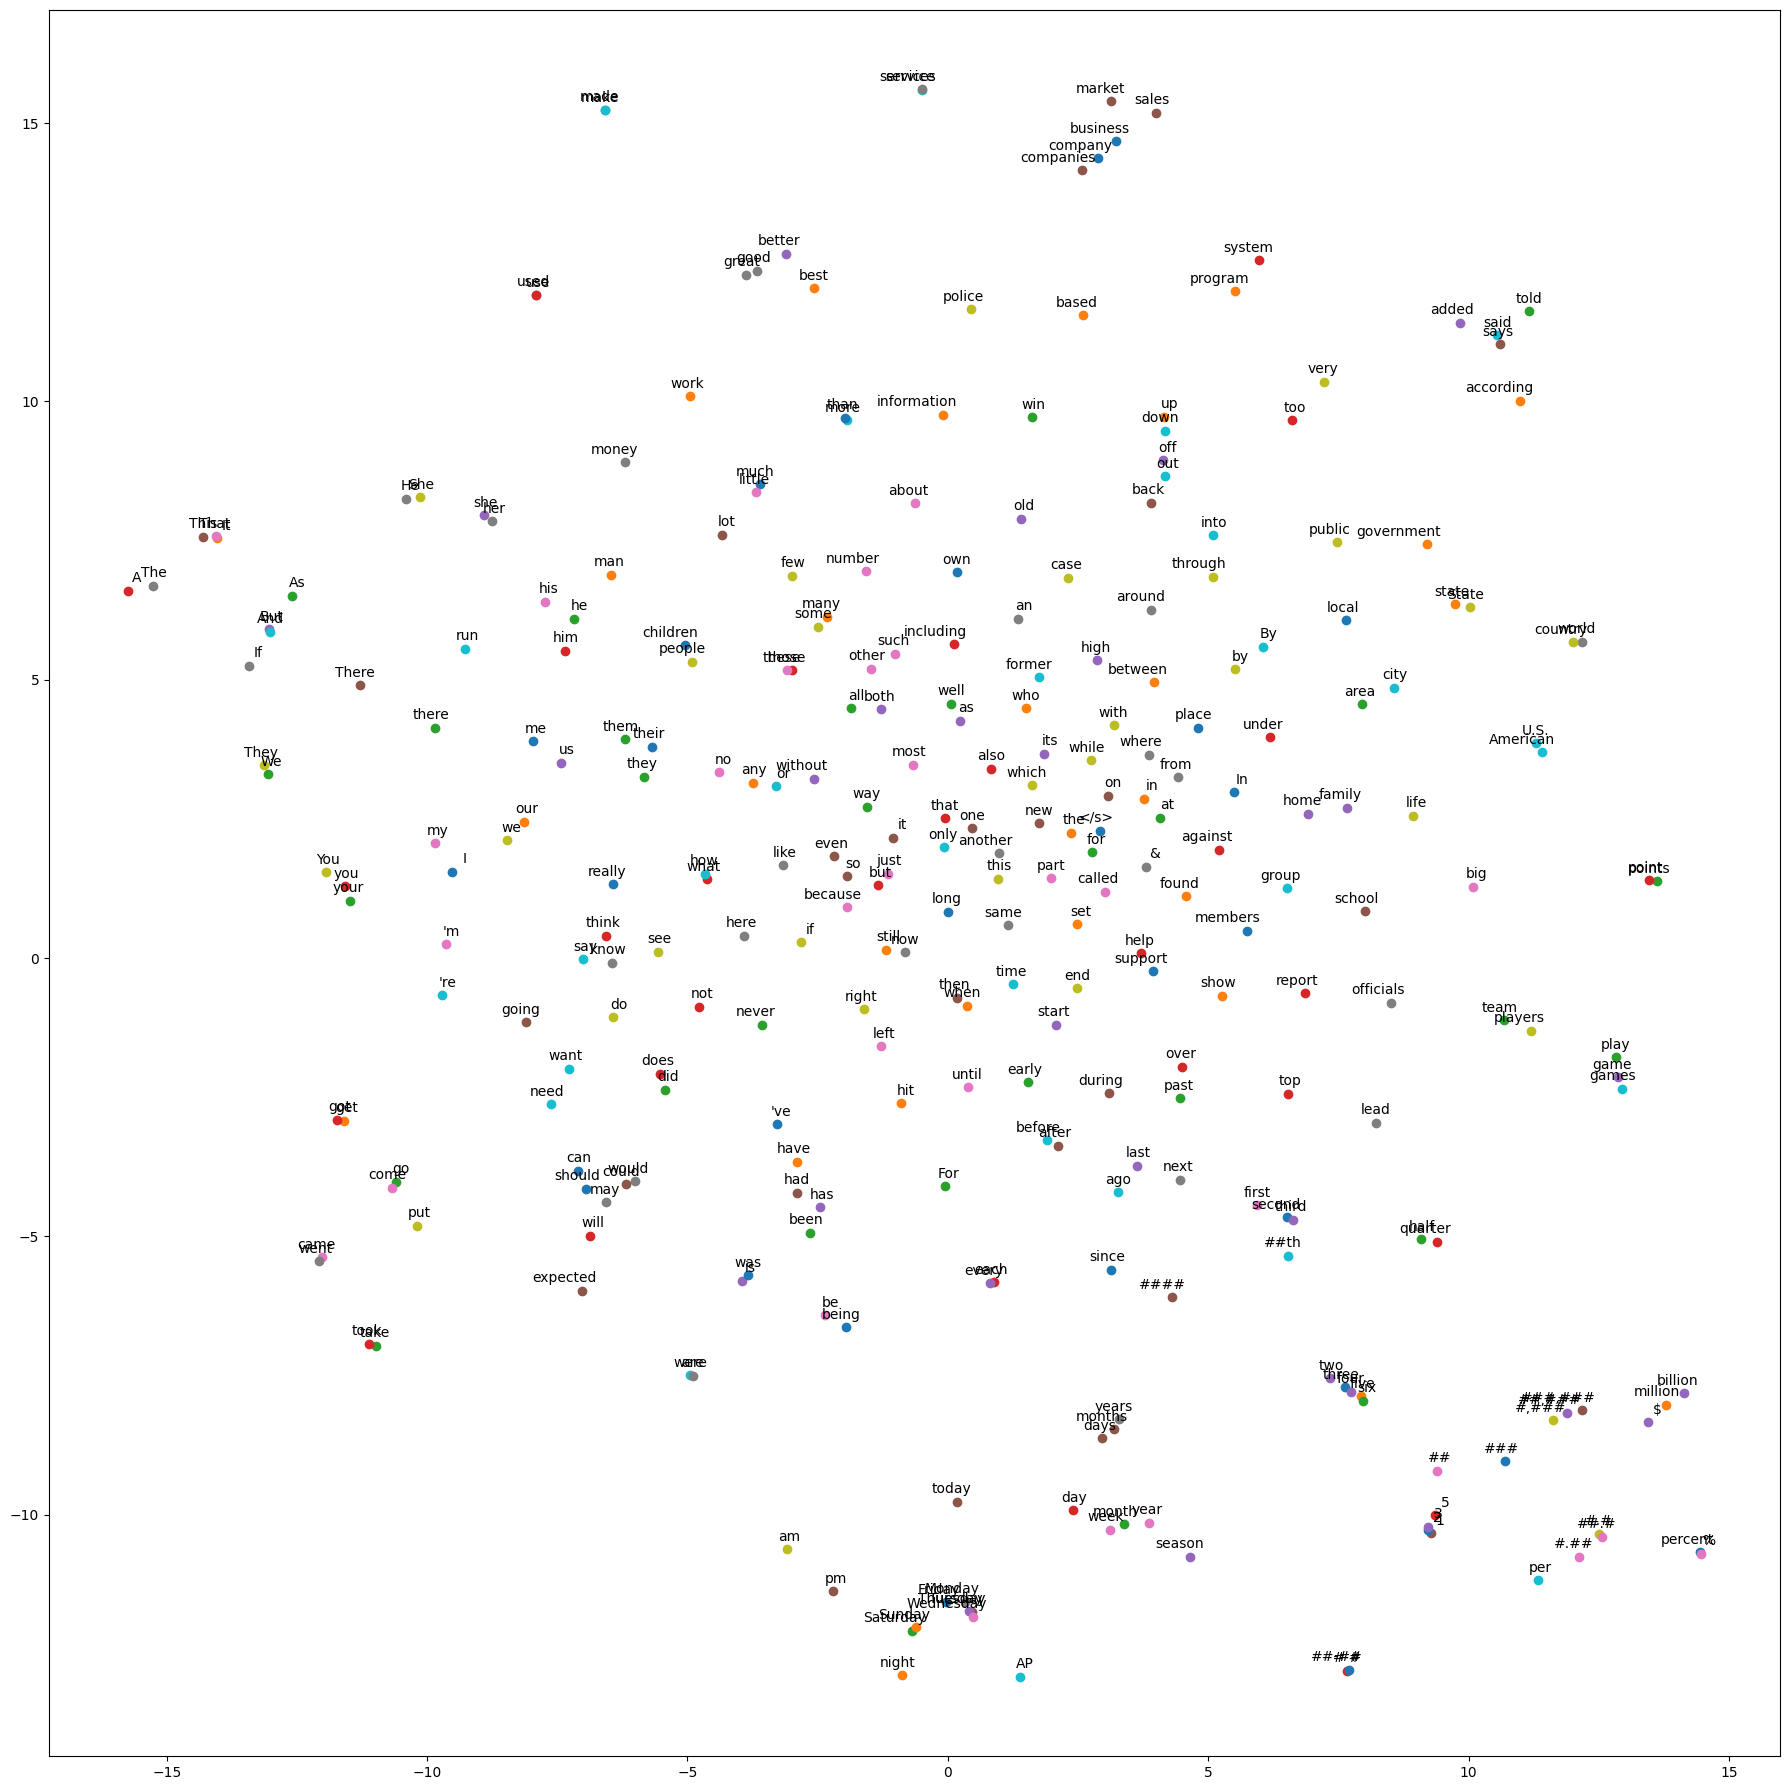

In [20]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, rcParams

rcParams.update({'figure.autolayout': True})
%matplotlib inline

# Limita el número de palabras a mostrar
limit = 300
vector_dim = 300

# Se obtienen las palabras y vectores asociados
words = []
embedding = np.array([])
i = 0
for word in wv.index_to_key:
    if i == limit: break

    # Se agrupan las palabras
    words.append(word)

    # Se almacenan los vectores asociados a cada palabra
    embedding = np.append(embedding, wv[word])

    i+=1

# Se transforma el vector en un formato adecuado
embedding = embedding.reshape(limit, vector_dim)


def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(10, 4),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    plt.savefig(filename)


# Se aplica un proceso de reducción de la dimensionalidad
tsne = TSNE(perplexity=30.0, n_components=2, init='pca', n_iter=5000)
low_dim_embedding = tsne.fit_transform(embedding)

# Finalmente se muestra la figura
plot_with_labels(low_dim_embedding, words)